# Test of Resampling Methods

## Utility Functions

In [38]:
import pandas as pd
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

%matplotlib inline

## Original Signal

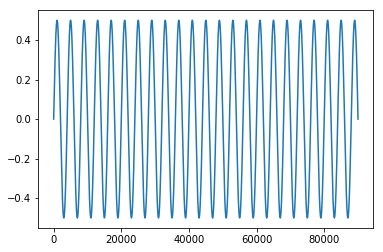

In [21]:
rsp = nk.rsp_simulate(duration=90, sampling_rate=1000, respiratory_rate=15, noise=0, method="sinusoidal")
nk.signal_plot(rsp)

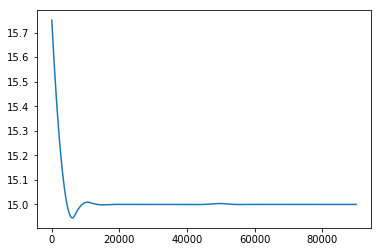

In [25]:
peaks, info = nk.rsp_findpeaks(rsp)
rate = nk.rsp_rate(peaks)["RSP_Rate"]
rate.plot()

In [26]:
rate.mean()

15.0139897440302

## Distord the signal

In [43]:
data = []
for noise_amplitude in np.linspace(0.01, 1, 200):
    distorted = nk.signal_distord(rsp, noise_amplitude=noise_amplitude)
    
    raw = nk.rsp_rate(nk.rsp_findpeaks(distorted)[0])["RSP_Rate"]
    
    # Khodadad 2018
    cleaned = nk.rsp_clean(distorted, sampling_rate=1000, defaults="khodadad2018")
    khodadad = nk.rsp_rate(nk.rsp_findpeaks(cleaned)[0])["RSP_Rate"]
    
    # Biosppy
    cleaned = nk.rsp_clean(distorted, sampling_rate=1000, defaults="biosppy")
    biosppy = nk.rsp_rate(nk.rsp_findpeaks(cleaned)[0])["RSP_Rate"]
    
    # Results
    rez = pd.DataFrame({"Raw_Mean" : [(rate - raw).mean()],
                        "Raw_SD" : [(rate - raw).std()],
                        "Khodadad_Mean" : [(rate - khodadad).mean()],
                        "Khodadad_SD" : [(rate - khodadad).std()],
                        "BioSPPy_Mean" : [(rate - biosppy).mean()],
                        "BioSPPy_SD" : [(rate - biosppy).std()],
                        "Noise_Amplitude": [noise_amplitude]})
    data += [rez]
data = pd.concat(data)

## Results

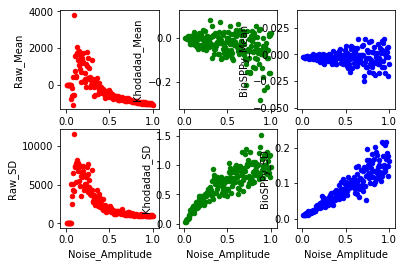

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=3)

data.plot.scatter(x="Noise_Amplitude", y="Raw_Mean", color='r', ax=axes[0,0])
data.plot.scatter(x="Noise_Amplitude", y="Raw_SD", color='r', ax=axes[1,0])
data.plot.scatter(x="Noise_Amplitude", y="Khodadad_Mean", color='g', ax=axes[0,1])
data.plot.scatter(x="Noise_Amplitude", y="Khodadad_SD", color='g', ax=axes[1,1])  
data.plot.scatter(x="Noise_Amplitude", y="BioSPPy_Mean", color='b', ax=axes[0,2])
data.plot.scatter(x="Noise_Amplitude", y="BioSPPy_SD", color='b', ax=axes[1,2])  